# TAG analysis

## Initial data load and setup

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
file_name = '../../data/fd-export.csv'

## read file
df = pd.read_csv(file_name)
cond_file_name = '../../data/conditions_list.csv'
df_conditions = pd.read_csv(cond_file_name)
"""
    Function to remove abnormal age.
    This is required for reusability purpose.
    
    @Input : dataframe
    @Return : dataframe
"""
def remove_abnormal_age(df):
    df.age = df.age.fillna(-1)
    invalid_ids = set(df[ (df.age<0) | (df.age > 100) ].user_id.values)
    valid_df = df[~df.user_id.isin(invalid_ids)]
    
    print("Valid users with norma age = {}, Percentage {}".format( valid_df.user_id.unique().shape[0]
                                                                  , valid_df.user_id.unique().shape[0]/
                                                               float( df.user_id.unique().shape[0] ) ))
    
    return valid_df

## filter the user
df_processed = remove_abnormal_age(df)

df_processed.head(10)
    

/home/shibintv/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Valid users with norma age = 20456, Percentage 0.9268270581305786


,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
1,QEVuQwEAWRNGnuTRqXG2996KSkTIEw==,31.0,male,US,2015-11-26,1069,Condition,Ulcerative colitis,0
2,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4
3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3169,Condition,hip pain when gettin up,3
4,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3170,Condition,pain in hand joints,4
5,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3171,Condition,numbness in right hand,2
6,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,1356,Condition,Headache,2
7,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3172,Condition,pain in left ankle,1
8,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3173,Condition,pain in left leg,1
9,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3174,Condition,pain in joints on feet,2
10,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,1.0,female,CA,2017-04-28,3175,Condition,neck and upper back pain,2


## Let's look at the tags

In [6]:
## filter only tags
df_tags = df[df.trackable_type == 'Tag']
df_tags.head(10)

,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value
26,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,-1.0,NaN,NaN,2015-05-26,1,Tag,tired,NaN
27,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,-1.0,NaN,NaN,2015-05-26,2,Tag,stressed,NaN
28,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,-1.0,NaN,NaN,2015-05-26,3,Tag,feels,NaN
33,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,-1.0,NaN,NaN,2015-06-14,13,Tag,good sleep,NaN
34,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,-1.0,NaN,NaN,2015-06-14,14,Tag,haircut,NaN
35,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,-1.0,NaN,NaN,2015-06-14,15,Tag,Derp,NaN
40,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,-1.0,NaN,NaN,2015-06-11,1,Tag,tired,NaN
41,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,-1.0,NaN,NaN,2015-06-11,10,Tag,ate breakfast,NaN
42,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,-1.0,NaN,NaN,2015-06-11,4,Tag,Went to work,NaN
43,QEVuQwEAO+R1md5HUn8+w1Qpbg7ogw==,-1.0,NaN,NaN,2015-06-11,11,Tag,Wrong about something,NaN


In [15]:
!pip install wordcloud
!pip install nltk

     |████████████████████████████████| 1.5MB 4.7MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp37-none-any.whl size=1449907 sha256=0c7dca427b54e1c4917fb36a25e48ae0d3f06ae9208e46c8f4710af703351ca7
  Stored in directory: /home/shibintv/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk


In [17]:
from wordcloud import WordCloud, STOPWORDS 

## get stop words
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk_stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shibintv/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [41]:
import numpy as np
def get_tags(df):
    df = df.dropna(subset = ['trackable_name'], axis = 0)
    print(df.shape)
    result_str = ''
    for value in df.trackable_name.values.tolist():
        result_str += ' ' + ' '.join([x.lower() for x in value.split()])
    return result_str

all_tags = get_tags(df_tags)

(207901, 9)


## Unigram

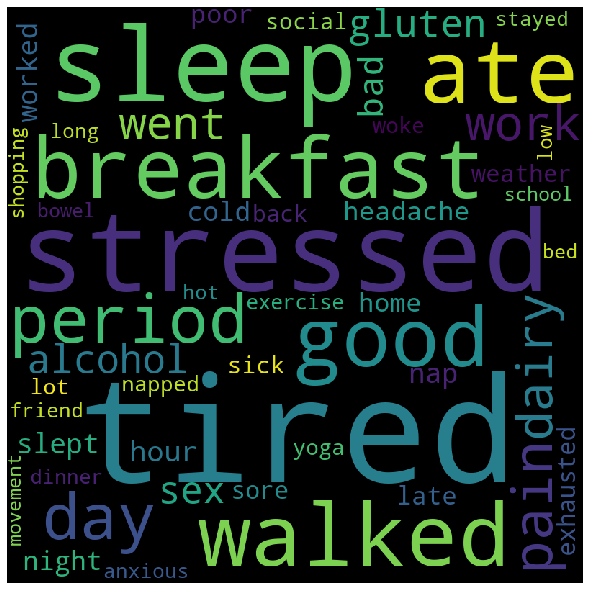

In [44]:
wordcloud = WordCloud(width = 800, height = 800, 
                
                stopwords = nltk_stop_words, 
                min_font_size = 10, scale = 1, max_words = 50, collocations = False).generate(all_tags) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Bigram

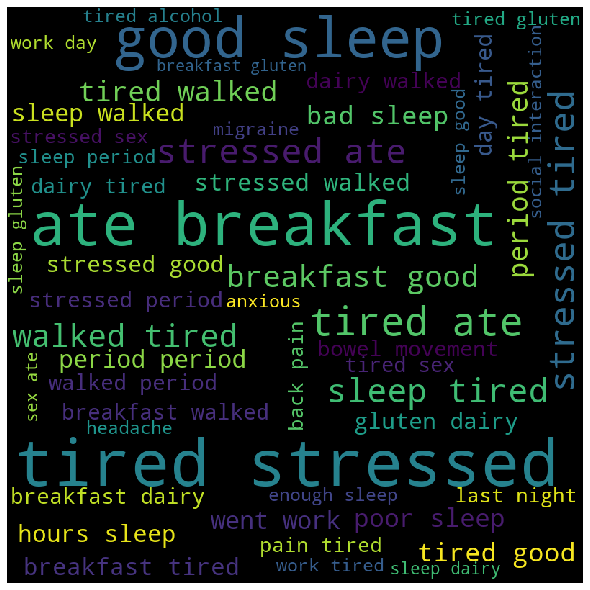

In [45]:
wordcloud = WordCloud(width = 800, height = 800, 
                
                stopwords = nltk_stop_words, 
                min_font_size = 10, scale = 1, max_words = 50, collocations = True).generate(all_tags) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [43]:
print(all_tags)

 tired stressed feels good sleep haircut derp tired ate breakfast went to work wrong about something confronted a coworker tired stressed had sex doctor appointment inventory at work stressed tired went to work worried saw a movie ate breakfast good sleep smoothie banana nectarine spinach coconut milk mango jimmy john's comcast >:( tired stressed ate breakfast tired ate breakfast ate breakfast sinus infection caffeine exercise tired smoothie banana tired holiday hot weather down sad down unfocused left sided pain ate breakfast good sleep coconut milk mango jimmy john's comcast >:( sinus infection caffeine exercise holiday tired stressed ate breakfast tired ate breakfast ate breakfast hot weather meditated hiking down sad hiking unfocused left sided pain happy tired tired stressed tired sunburn good sleep tired superlong nap hiking tired tired tired tired stressed stressed very tired nausea no appitite barometric pressure change slept in very tired nausea no appitite tired tired tired w